In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns",120)
pd.set_option("display.max_rows",120)

In [3]:
df= pd.read_csv("train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## EDA

 # what whould we expact to see here
 1. item with high weights have high price
 2. item with low fat has high price because healthy food costs more
 3. item with high MRP have low sales
 4. MRP at super market may be high
 5. The Older the outlet the more sales we expact
 

In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

* In this data set we have 8523 rows and 12 columns
* two columns have missing value [Item_Weight and Outlet_Size]

In [8]:
num_df= df.select_dtypes(include=["float64","int64"])
cat_df=df.select_dtypes(include="object")
print(num_df.shape[1] ,"numarical features")
print(cat_df.shape[1] ,"categorical features")

5 numarical features
7 categorical features


# Univariate analysis with Numarical data

In [9]:
num_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


<Figure size 360x360 with 0 Axes>

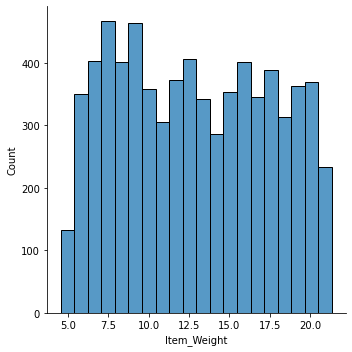

In [10]:
plt.figure(figsize=[5,5])
sns.displot(data=num_df,x=num_df.Item_Weight)
plt.show()

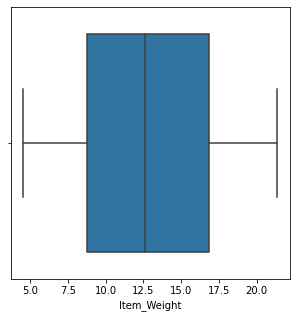

In [11]:
plt.figure(figsize=[5,5])
sns.boxplot(data=num_df,x=num_df.Item_Weight)
plt.show()

Item weights:
mean=12.85
std =4.643456	

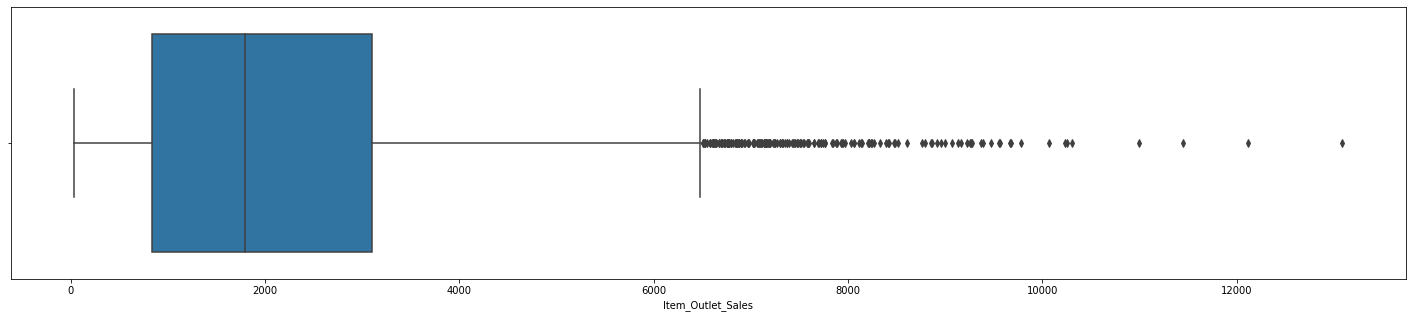

In [12]:
plt.figure(figsize=[25,5])
sns.boxplot(data=num_df,x=num_df.Item_Outlet_Sales,)
plt.show()

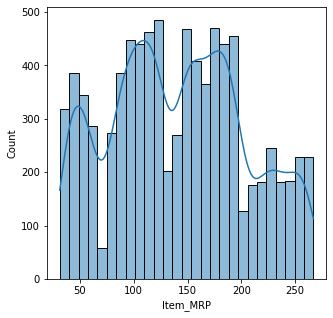

In [13]:
plt.figure(figsize=[5,5])
sns.histplot(data=num_df,x=num_df.Item_MRP,kde=True)
plt.show()

most of the item has MRP around(50,100,200)
266 is the max and 31 is the lowest price we got see

In [14]:
num_df["Outlet_Establishment_Year"].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

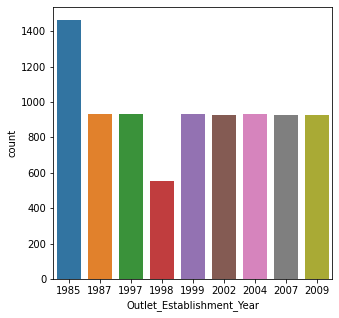

In [15]:
plt.figure(figsize=[5,5])
sns.countplot(data=num_df,x=num_df.Outlet_Establishment_Year)
plt.show()

there are more older shops

# Univariate analysis with catagorical data

In [16]:
cat_df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [17]:
cat_col= cat_df.keys()

1. Item Identifier and Outlet_identifier won't be much use full us for now

In [18]:
print(cat_df["Item_Fat_Content"].unique())
print(cat_df["Item_Fat_Content"].value_counts())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


.LF and low fat means the same
.reg and Regular means the same
###### So, there are only two types of Fat present 
we will deal with it in data cleaning

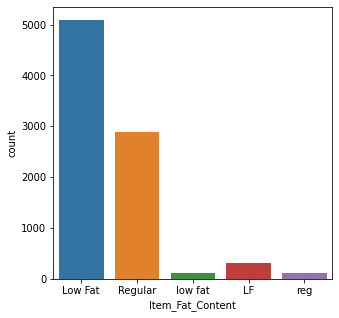

In [19]:
plt.figure(figsize=[5,5])
sns.countplot(data=cat_df,x=cat_df.Item_Fat_Content)
plt.show()

In [20]:
print(cat_df["Item_Type"].unique())
print(cat_df["Item_Type"].value_counts())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


* fruits and Vegetables are high are high becouse it's daily use product
* not much are intrested in sea food, we have low counts as well.

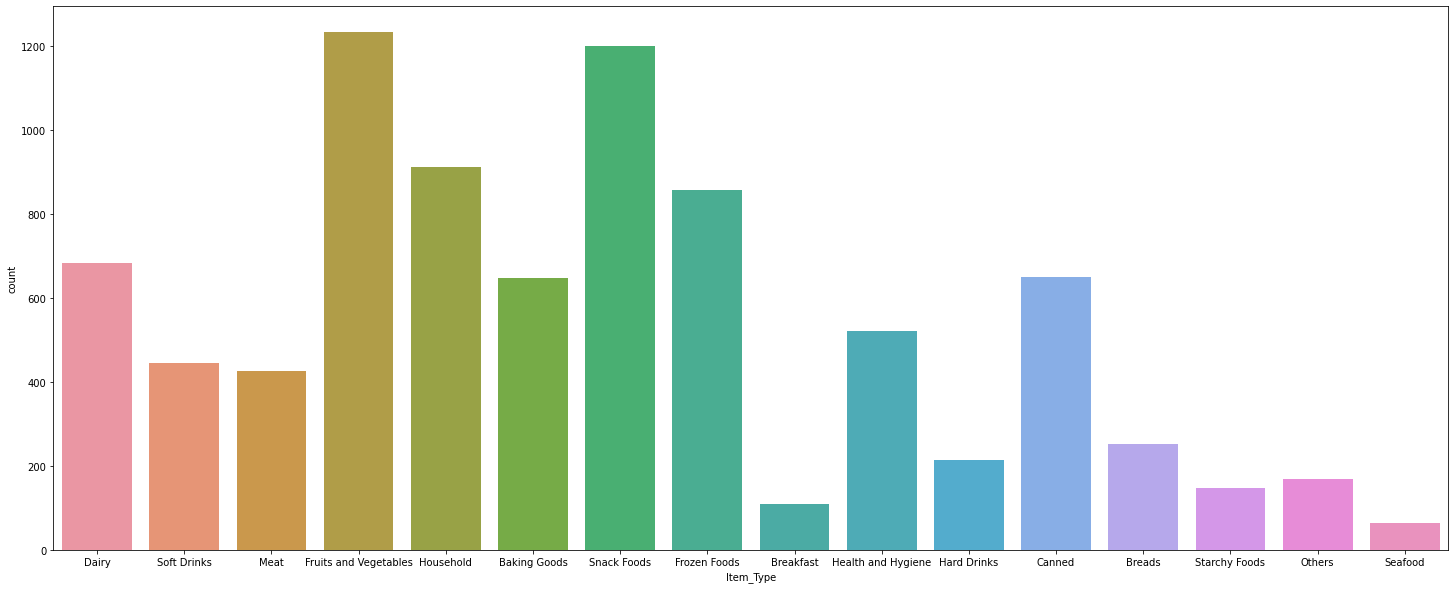

In [21]:
plt.figure(figsize=[25,10])
sns.countplot(data=cat_df,x=cat_df.Item_Type)
plt.show()

In [22]:
cat_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [23]:
print(cat_df["Outlet_Size"].unique())
print(cat_df["Outlet_Size"].value_counts())

['Medium' nan 'High' 'Small']
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


##### we saw that before Outlet_size has some np.nan values 
* there are only three types of outlet size available
* we will deal with nan values later
    

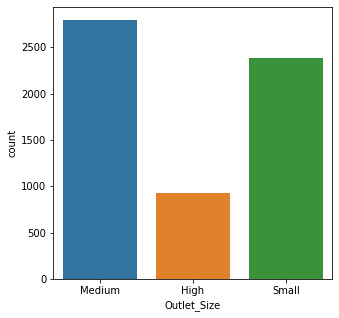

In [24]:
plt.figure(figsize=[5,5])
sns.countplot(data=cat_df,x=cat_df.Outlet_Size)
plt.show()

In [25]:
print(cat_df["Outlet_Location_Type"].unique())
print(cat_df["Outlet_Location_Type"].value_counts())

['Tier 1' 'Tier 3' 'Tier 2']
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


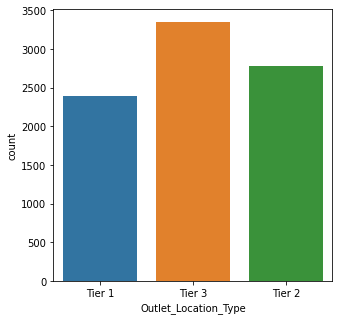

In [26]:
plt.figure(figsize=[5,5])
sns.countplot(data=cat_df,x=cat_df.Outlet_Location_Type)
plt.show()

In [27]:
print(cat_df["Outlet_Type"].unique())
print(cat_df["Outlet_Type"].value_counts())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


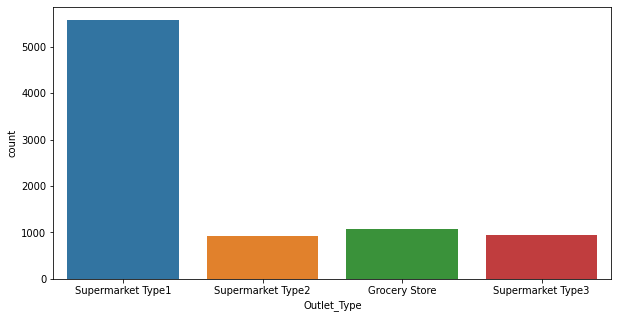

In [28]:
plt.figure(figsize=[10,5])
sns.countplot(data=cat_df,x=cat_df.Outlet_Type)
plt.show()

# Bivariate analysis using numarical and categorical data

<Figure size 1440x1440 with 0 Axes>

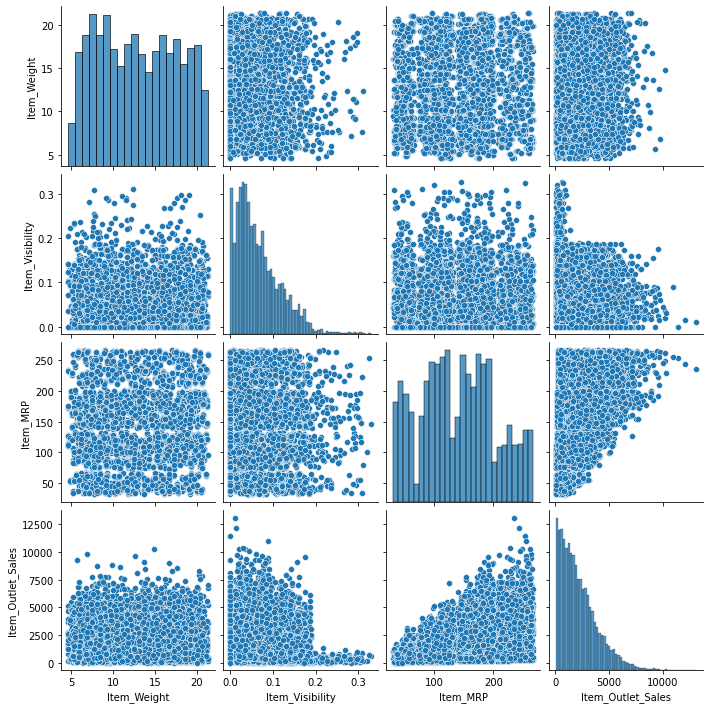

In [29]:
plt.figure(figsize=[20,20])
sns.pairplot(num_df[["Item_Weight","Item_Visibility","Item_MRP","Item_Outlet_Sales"]])
plt.show()

* in item visibility and Item_Outlet_Sales, we see that item with visibility more than 0.2 has less sales
* and as the price increases sales also increasing
* item weights has no impacts on sales

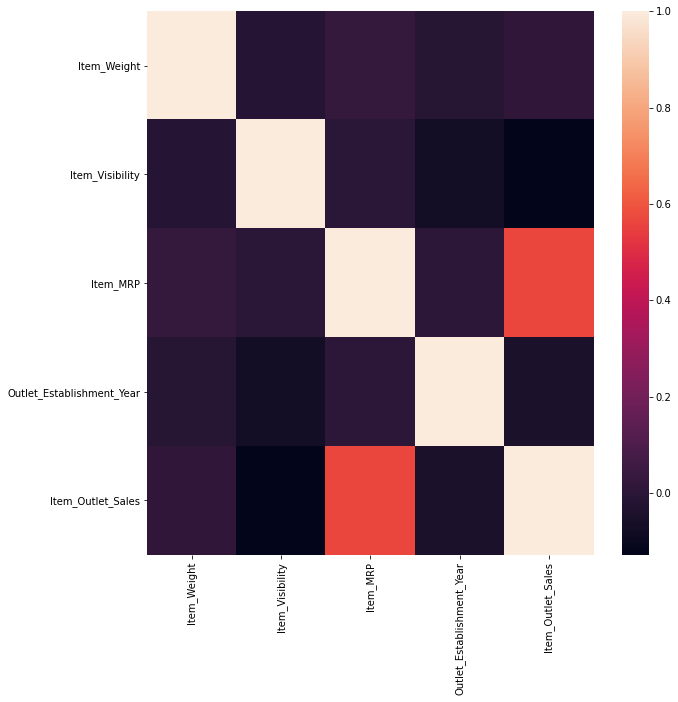

In [30]:
plt.figure(figsize=[10,10])
sns.heatmap(num_df.corr())
plt.show()

In [31]:
cat_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [32]:
cat_df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

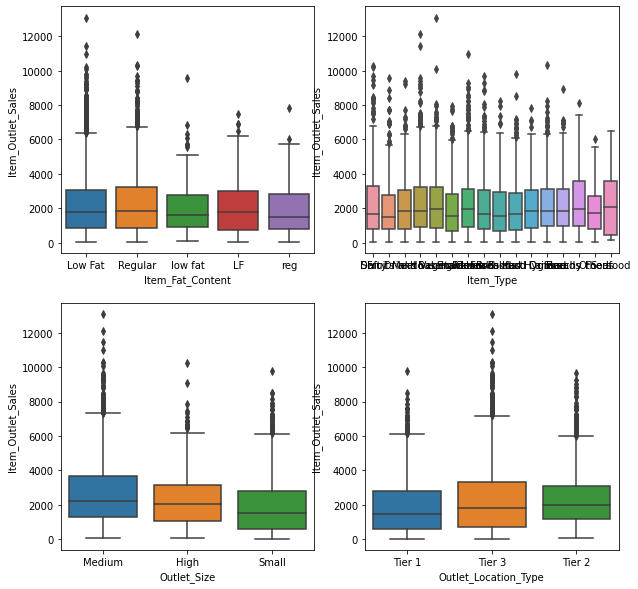

In [33]:
fig= plt.figure(figsize=[10,10])
ax1= fig.add_subplot(2,2,1)
sns.boxplot(x=df.Item_Fat_Content,y=df.Item_Outlet_Sales,data=df,ax=ax1)

ax2=fig.add_subplot(2,2,2)
sns.boxplot(x=df.Item_Type,y=df.Item_Outlet_Sales,data=df,ax=ax2)

ax3=fig.add_subplot(2,2,3)
sns.boxplot(x=df.Outlet_Size,y=df.Item_Outlet_Sales,data=df,ax=ax3)

ax4=fig.add_subplot(2,2,4)
sns.boxplot(x=df.Outlet_Location_Type,y=df.Item_Outlet_Sales,data=df,ax=ax4)



### Lets find the item that has more total no. of sales

In [34]:
result= df.groupby("Item_Type").sum()

In [35]:
item= [item for item,data in df.groupby("Item_Type")]

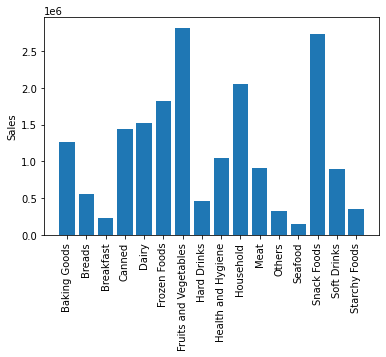

In [36]:
plt.bar(item,result["Item_Outlet_Sales"])
plt.xticks(rotation="vertical")
plt.ylabel("Sales")
plt.show()

* total sales of each items

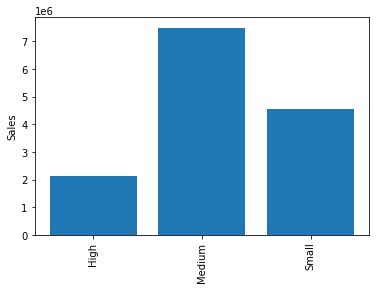

In [37]:
result= df.groupby("Outlet_Size").sum()
outlet_size= [item for item,data in df.groupby("Outlet_Size")]

plt.bar(outlet_size,result["Item_Outlet_Sales"])
plt.xticks(rotation="vertical")
plt.ylabel("Sales")
plt.show()

 * Medium sized outlet sales more

## missing value imputation

In [38]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### missing value imputation with the help of catagorical reference
 *** Item_weights can be determined by Item_types?
 *** lets see if it's true

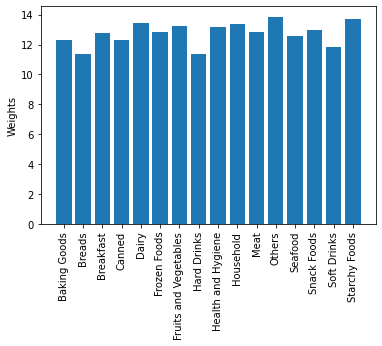

In [39]:
result= df.groupby("Item_Type").mean()
outlet_size= [item for item,data in df.groupby("Item_Type")]

plt.bar(outlet_size,result["Item_Weight"])
plt.xticks(rotation="vertical")
plt.ylabel("Weights")
plt.show()

we don't see a much difference here ,substituting null with the mean of all will be safe,
but using mean of catagorical referance will play a good to the outcomes

In [40]:
cat_reff= df['Item_Type'].unique()

for value in cat_reff:
    df.update(df[df.loc[:,"Item_Type"]==value]["Item_Weight"].replace(
        np.nan,df[df.loc[:,"Item_Type"]==value]["Item_Weight"].mean()))

In [41]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [42]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Data cleaning

In [43]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

* we saw that before some of datapoints are mislabled as LF,reg and low fat

In [44]:
df["Item_Fat_Content"]= df["Item_Fat_Content"].map(
    {"low fat":"Low Fat",
     "reg":"Regular Fat",
     "LF":"Low Fat",
     "Regular":"Regular Fat",
     "Low Fat":"Low Fat"})

In [45]:
df["Item_Fat_Content"].value_counts()

Low Fat        5517
Regular Fat    3006
Name: Item_Fat_Content, dtype: int64

In [46]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular Fat,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular Fat,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [47]:
df['Years_Established'] = df['Outlet_Establishment_Year'].apply(lambda x: 2021 - x) 
df.drop(columns=['Outlet_Establishment_Year'],inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular Fat,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular Fat,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,34


In [48]:
#here we found that in Item_visibility has some 0 value, which makes no sense so lets replace it with mean value

visibility_avg = df.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
missing_values = (df['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(missing_values))
df.loc[missing_values,'Item_Visibility'] = df.loc[missing_values,'Item_Identifier'].apply(
    lambda x: visibility_avg.at[x, 'Item_Visibility'])
print ('Number of 0 values after modification: %d'%sum(df['Item_Visibility'] == 0))

Number of 0 values initially: 526
Number of 0 values after modification: 0


In [49]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular Fat,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular Fat,0.015274,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.008082,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,34


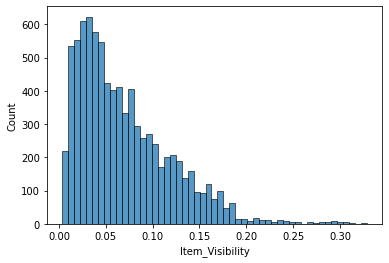

In [50]:
sns.histplot(df.Item_Visibility)
plt.show()

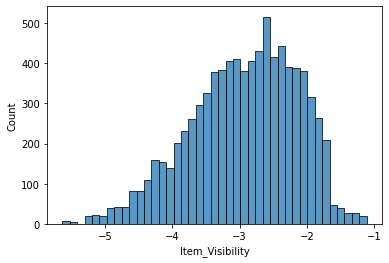

In [51]:
sns.histplot(np.log(df["Item_Visibility"]))
plt.show()

In [52]:
#to make the distribution normal
df["Item_Visibility"]=np.log(df["Item_Visibility"])

In [53]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,-4.132215,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular Fat,-3.948780,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,-4.088756,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular Fat,-4.181625,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,-4.818097,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,34


In [54]:
##df.to_csv('cleaned_data.csv',index=False)

### data and vectors
* selecting witch should go for further steps,and witch shuld we leave behind

In [55]:
train_df=df.drop(columns=["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"],axis=1)
train_vactor=df["Item_Outlet_Sales"]

In [56]:
train_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,9.300,Low Fat,-4.132215,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,22
1,5.920,Regular Fat,-3.948780,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,12
2,17.500,Low Fat,-4.088756,Meat,141.6180,Medium,Tier 1,Supermarket Type1,22
3,19.200,Regular Fat,-4.181625,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,23
4,8.930,Low Fat,-4.818097,Household,53.8614,High,Tier 3,Supermarket Type1,34
...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,-2.868511,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,34
8519,8.380,Regular Fat,-3.057982,Baking Goods,108.1570,Medium,Tier 2,Supermarket Type1,19
8520,10.600,Low Fat,-3.347099,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,17
8521,7.210,Regular Fat,-1.929501,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,12


In [57]:
train_vactor

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

## converting catagorical into one hot incoding

In [58]:
train_df=pd.get_dummies(train_df)

In [59]:
train_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Years_Established,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular Fat,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,-4.132215,249.8092,22,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
1,5.92,-3.948780,48.2692,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,17.50,-4.088756,141.6180,22,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
3,19.20,-4.181625,182.0950,23,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,8.93,-4.818097,53.8614,34,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [60]:
cols=train_df.keys()
cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Years_Established',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular Fat',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

## Preprocessing

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
scaler= MinMaxScaler()
scaler.fit(train_df)

MinMaxScaler()

In [63]:
train_df= pd.DataFrame(scaler.transform(train_df),columns=cols)
train_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Years_Established,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular Fat,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.332202,0.927507,0.416667,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.081274,0.372782,0.072068,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.770765,0.341816,0.468288,0.416667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.871986,0.321271,0.640093,0.458333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.260494,0.180469,0.095805,0.916667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## spliting to training data and validation data

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_val,Y_train,Y_val= train_test_split(train_df,train_vactor,test_size=0.3,random_state=42)

# Model training
## 1. Linear regrassion

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
base_model= LinearRegression()
base_model.fit(X_train,Y_train)
base_model.score(X_val,Y_val)

0.567429201493335

In [68]:
from sklearn.metrics import mean_squared_error,r2_score

In [69]:
pred=base_model.predict(X_val)
print(mean_squared_error(Y_val,pred))

1211628.0067427354


In [70]:
r2_LM=r2_score(Y_val,pred)
print(r2_score(Y_val,pred))


0.567429201493335


In [71]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [72]:
def cross_validation(model):
    kfold = KFold(n_splits=10, random_state=7)
    results = cross_val_score(model, train_df, train_vactor, cv=kfold)
    return results.mean()*100, results.std()*100

In [73]:
accuracy_LM,std_LM=cross_validation(base_model)
print(accuracy_LM,std_LM)

55.67569013287462 2.179672026132049


c:\users\adesh kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


## 2. Random forest regressor

In [75]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, Y_train)

y_pred = rf_reg.predict(X_val)

NameError: name 'R2' is not defined

In [76]:
r2_RF= r2_score(Y_val,y_pred)
print(r2_RF)

0.5485066145237474


In [77]:
accuracy_RF,std_rf=cross_validation(rf_reg)

c:\users\adesh kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NameError: name 'std_RF' is not defined

In [78]:
print(accuracy_RF,std_rf)

55.03265602995459 3.775589524463522


## XGB

In [82]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor()
model_xgb.fit(X_train,Y_train)
y_pred = model_xgb.predict(X_val)
r2_xgb= r2_score(Y_val,y_pred)
print(r2_xgb)

0.528515762086513


In [83]:
accuracy_xgb,std_xgb=cross_validation(model_xgb)
print(accuracy_xgb,std_xgb)

c:\users\adesh kumar\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


53.11587198544674 3.853119013883287


In [86]:
models=pd.DataFrame({"model":["linear","RandomFor","XGB"],"R2_score":[r2_LM,r2_RF,r2_xgb],"accuracy":[accuracy_LM,accuracy_RF,accuracy_xgb],"std":[std_LM,std_rf,std_xgb]})

In [87]:
models

,model,R2_score,accuracy,std
0,linear,0.567429,55.675690,2.179672
1,RandomFor,0.548507,55.032656,3.775590
2,XGB,0.528516,53.115872,3.853119
